## Методы понижения размерности данных

В задачах разведочного анализа данных (Exploratory Data Analysis - EDA), задачах кластеризации часто возникает проблема, связанная с большой размерностью данных. В этих задачах чаще приходится человеку разбираться в зависимостях между признаками, их интерпретацией. 

Возникает идея, например, каким-то образом "сгруппировать" параметры с явной степенью корреляции, спроецировать данные на области меньшей размерности.

Еще что-то бла-бла...


### Анализ главных компонент (Principal Component Analysis - PCA)

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [32]:
data = load_breast_cancer()

In [37]:
print(f"Размерность данных: {data.data.shape}")

Размерность данных: (569, 30)


In [48]:
print(f"Названия свойств (кол-во:{len(data.feature_names)}): {data.feature_names}")

Названия свойств (кол-во:30): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [51]:
print(np.mean(data.data, axis = 0))
print(np.std(data.data, axis = 0))

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


In [52]:
stdScaler = StandardScaler()
X_scaled = stdScaler.fit_transform(data.data)

In [54]:
print(np.mean(X_scaled, axis = 0))
print(np.std(X_scaled, axis = 0))

[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [55]:
pca = PCA( n_components = 2 )
pca.fit( X_scaled )
X_pca = pca.transform( X_scaled )

In [56]:
print(f"Форма исходых данных: {X_scaled.shape}")
print(f"Форма преобразованых данных: {X_pca.shape}")

Форма исходых данных: (569, 30)
Форма преобразованых данных: (569, 2)


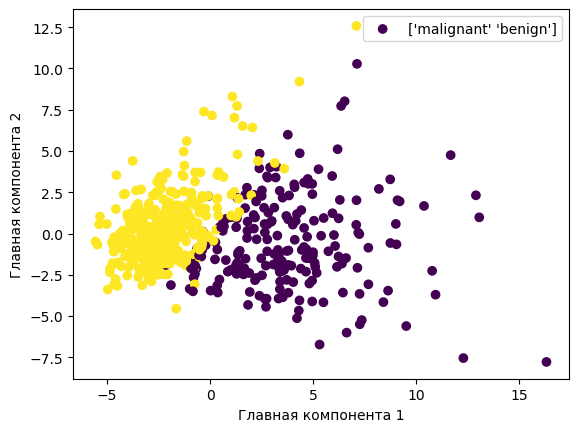

In [65]:
plt.scatter( X_pca[:,0], X_pca[:,1], c = data.target, label = data.target_names )
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.legend()
plt.show()

<hr>

### UMAP

### T-SNE

In [22]:
from sklearn.datasets import load_digits


In [2]:
smallDigits = load_digits()

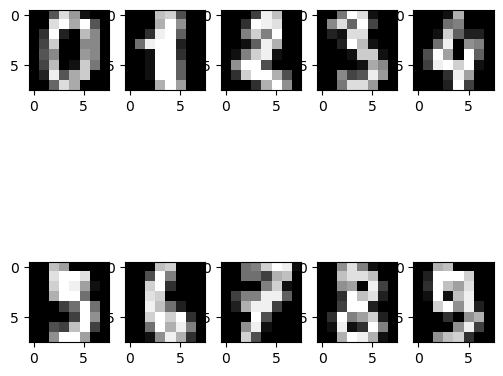

In [14]:
fig, axes = plt.subplots(2,5, figsize = (6,6))
for ax, img in zip( axes.ravel(), smallDigits.images):
    ax.imshow( img, cmap = "gray" )
                   

In [25]:
scaler = StandardScaler()
#
# данные каждой картинки записаны по строкам, а StandardScaler работает по столбцам. 
# нормировать данные корректнее в рамках каждой отдельной картинки, а не по значению в позиции пикселя
# всех изображений, поэтому для нормировки транспонируем матрицу, стандартизуем, а потом обратно транспонируем
#
scaledX = scaler.fit_transform(smallDigits.data.transpose()).transpose()

(1797, 64)